In [1]:
import glob
from meza import io
import numpy as np
import pandas as pd
import pandas_access as mdb
import zipfile
import os
from os.path import join, basename
from params import get_params
pd.set_option("display.max_columns", 150)

In [3]:
params = get_params()
path = '/Users/pierredelice/Library/CloudStorage/Dropbox/Mac/Documents/GitHub/Dgis/Data/nacimiento/'
file = glob.glob(join(path,r'*.csv'))
file_zip = glob.glob(join(path,r'*.zip'))
nacimiento_2020 = 'nac_unzip/Nacimientos_cierre_2020/Nacimientos_cierre_2020.csv'

for arc_name in glob.iglob(os.path.join(path, "*.zip")):
    arc_dir_name = os.path.splitext(os.path.basename(arc_name))[0]
    zf = zipfile.ZipFile(arc_name)
    zf.extractall(path=os.path.join(path, "nac_unzip", arc_dir_name))
    zf.close()  # Close file after extraction is completed

#Iterate through folders, directories and subdirectories.
def list_files(dir):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            r.append(os.path.join(root, name))
    return r

files_mdb =list_files(join(path,'nac_unzip'))

In [9]:
## Access Birth 2020

cols = ['FOLIO','NOMBRE','PRIMERAPELLIDO','SEGUNDOAPELLIDO','CURPMADRE',
'FECHANACIMIENTOMADRE','ENTIDADNACIMIENTO','ENTIDADNACIMIENTOD',
'MUNICIPIONACIMIENTO','MUNICIPIONACIMIENTOD',
'ENTIDADRESIDENCIA','ENTIDADRESIDENCIAD','MUNICIPIORESIDENCIA',
'MUNICIPIORESIDENCIAD','LOCALIDADRESIDENCIA','LOCALIDADRESIDENCIAD',
'HIJOSNACIDOSMUERTOS','HIJOSNACIDOSVIVOS','CERTIFICADODEFUNCION',
'AFILIACION','AFILIACIOND','FECHANACIMIENTO','HORANACIMIENTO','SEXO',
'ENTIDADFEDERATIVAPARTO','ENTIDADFEDERATIVAPARTOD','MUNICIPIOPARTO',
'MUNICIPIOPARTOD','LOCALIDADPARTO','LOCALIDADPARTOD','CODIGOPOSTALPARTO']

name = {'PRIMERAPELLIDO':'paterno',
'SEGUNDOAPELLIDO':'materno',
'CURPMADRE':'curp',
'FECHANACIMIENTOMADRE':'fech_nac_madre',
'ENTIDADNACIMIENTO':'ent_nac_madre',
'MUNICIPIONACIMIENTO':'mun_nac_madre',
'ENTIDADRESIDENCIA':'ent_res',
'MUNICIPIORESIDENCIA':'mun_res',
'LOCALIDADRESIDENCIA':'local_res',
'HIJOSNACIDOSMUERTOS':'hijos_muertos',
'HIJOSNACIDOSVIVOS':'hijos_vivos',
'FECHANACIMIENTO':'fech_nac',
'ENTIDADFEDERATIVAPARTO':'ent_parto',
'MUNICIPIOPARTO':'mun_parto',
'LOCALIDADPARTO':'localidad_parto'}

#Read data
nac2020 = pd.read_csv(join(path,nacimiento_2020), usecols= cols, low_memory=False)

#Rename columns
nac2020.rename(columns=name, inplace =True)

#To lower case columns
nac2020.columns = [x.lower() for x in nac2020.columns]


#To lower strings columns
nac2020 = nac2020.apply(lambda x: x.astype(str).str.lower())

#Convert to string
nac2020 = nac2020.convert_dtypes()

#Create fullname: Nombre + Apellido materno y paterno
nac2020['name'] = nac2020[['nombre', 'paterno', 'materno']].agg(' '.join, axis=1)

In [46]:
nac2020[['name','nombre','paterno','materno']].isnull().sum()

name       0
nombre     0
paterno    0
materno    0
dtype: int64

In [29]:
#Create fullname: Nombre + Apellido materno y paterno
nac2020['name'] = nac2020[['nombre', 'paterno', 'materno']].agg(' '.join, axis=1)

In [32]:
(nac2020[['nombre', 'paterno','materno', 'name']].nunique()/len(nac2020))

nombre     0.193663
paterno    0.021205
materno    0.020418
name       0.948284
dtype: float64

<AxesSubplot: >

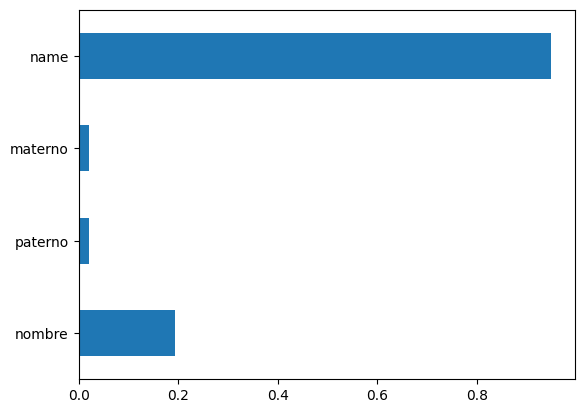

In [30]:
(nac2020[['nombre', 'paterno','materno', 'name']].nunique()/len(nac2020)).plot(kind='barh')

In [ ]:
pd.DataFrame(nac2020.groupby(['name']).value_counts())

In [ ]:
import re
stopwords = ['sin informacion']

In [5]:
#pd.concat([pd.read_csv(idx,encoding= 'unicode_escape') for idx in file])

from mdb_parser import MDBParser, MDBTable

db = MDBParser(file_path=files_mdb[2])


# Get and print the database tables
print(db.tables)

# Get a table from the DB.
table = db.get_table("NACIMIENTO")

# Or you can use the MDBTable class.
table = MDBTable(file_path=files_mdb[2], table="NACIMIENTO")

# Get and print the table columns.
print(table.columns)

# Iterate the table rows.
#for row in table:
#    print(row)


In [7]:
nacimiento = []
for row in table:
    nacimiento.append(row)


In [8]:
cols = ['FOLIO','NOMBRE','PATERNO','MATERNO','CURP_M','ENT_NACM','MPO_NACM','FECH_NACM', 
'EDOCIVIL','CALLE_RES','ENT_RES','MPO_RES','LOC_RES','HIJO_SOBV','CERTDEF',
 'DERHAB','NIV_ESCOL','OCUPHAB','FECH_NACH','HORA_NACH','SEXOH']

nac_sample = pd.DataFrame(nacimiento, columns = table.columns)
nac_sample = nac_sample[cols] 
nac_sample = nac_sample.sample(n=10000, random_state=1)
nac_sample.columns = nac_sample.columns.str.lower()

nac_sample[['nombre', 'paterno', 'materno', 'calle_res', 'ocuphab']] = \
    (nac_sample[['nombre', 'paterno', 'materno', 'calle_res', 'ocuphab']]
    .astype('category')
    .apply(lambda x: x.str.lower()))

In [ ]:
nac_sample['nombre'].value_counts().plot()